<a href="https://colab.research.google.com/github/saltatt/Final-Project-of-discipline-Fundamentals-of-Data-Mining-and-Machine-Learning/blob/main/clean_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: Классификация видео игр
# Авторы:
 * Тұрғын Салтанат
 * Уршукова Томирис

Датасет был взят по этой ссылке https://www.kaggle.com/datasets/lorentzyeung/imdb-video-games-dataset в Kaggle

Именно этот датасет мы выбрали из-за того, что он показался интересным чтобы провести с ним анализы и задания заданные нам. Сам датасет о видео-играх, которые в нашем веке достаточно популярны среди людей, будь то детей и взрослых. Также было любопытно посмотреть как датасет будет проигрываться с регрессией и обучением. Датасет мы выбирали по критериям указанными в документе о финальном проекте, поэтому данный датасет составляет 14682 данных и все они связанны с видео-играми. Далее следуя заданиям мы выполнили нужный анализ с которым можно ознакомиться ниже.

# Оставляем все колонки, но удаляем строки с пропусками в нужных для регрессии столбцах
Выбор колонок для линейной регрессии

Для задачи линейной регрессии мы выбираем:

- **User Rating** — признак (X)  
  - Это числовая колонка с оценками пользователей игры.  
  - Логично предположить, что чем выше рейтинг пользователей, тем популярнее игра.  
  - Является независимой переменной в модели.

- **Popularity** — целевая переменная (y)  
  - Это числовая колонка, отражающая популярность игры.  
  - Линейная регрессия предсказывает численное значение, поэтому именно она подходит как зависимая переменная.

> Остальные колонки (`Title`, `Genre`, `Number of Votes`, `Runtime`, `Year`, `Director`, `Stars`, `Certificate`) оставлены в датасете для дальнейшего анализа, но в простом примере одномерной регрессии не используются:
> - категориальные колонки требуют кодирования,
> - для визуализации scatter plot и линии регрессии проще использовать один признак.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("imdb_video_games.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14682 entries, 0 to 14681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Popularity       14682 non-null  int64  
 1   Title            14682 non-null  object 
 2   Genre            14682 non-null  object 
 3   User Rating      8654 non-null   float64
 4   Number of Votes  8654 non-null   object 
 5   Runtime          101 non-null    object 
 6   Year             14463 non-null  float64
 7   Summary          8480 non-null   object 
 8   Director         3967 non-null   object 
 9   Stars            8617 non-null   object 
 10  Certificate      6704 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
df_clean = df.dropna(subset=['Popularity', 'User Rating'])

In [ ]:
X = df_clean['User Rating'].values.reshape(-1, 1)
y = df_clean['Popularity'].values.reshape(-1, 1)

### Формулы градиентов (для отчёта)

Модель линейной регрессии:
$
\hat y = wX + b
$

Функция потерь (MSE):
$
L=\frac{1}{N}\sum (y - \hat y)^2
$

Градиенты:
$
frac{\partial L}{\partial w} = -\frac{2}{N}\sum X(y - \hat y)
$
$
frac{\partial L}{\partial b} = -\frac{2}{N}\sum (y - \hat y)
$


# Задачи (обязательные)
# Линейная регрессия (реализация с нуля).

* Реализовать градиентный спуск (batch или mini-batch) для обучения линейной регрессии.

* Вывести и показать: функция потерь (MSE), график потерь по эпохам, влияние скорости обучения (learning rate), найденные коэффициент и интерсепт.

* На странице/в ноутбуке — scatter plot данных и линия регрессии с доверительным интервалом.

Добавляем столбец единиц для интерсепта

In [ ]:
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

1 пункт
* Создаем функцию gradient_descent, которая обновляет коэффициенты линейной регрессии с использованием градиента MSE.

* Используем batch градиентный спуск (все данные на каждой итерации).

* Храним историю потерь для последующей визуализации

In [ ]:
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent(X, y, lr=0.01, epochs=500):
    m = len(y)
    theta = np.random.randn(2,1)
    history = []

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradients = (2/m) * X.T.dot(error)
        theta -= lr * gradients
        history.append(compute_mse(y, y_pred))

    return theta, history

Пункт 2: Вывести и показать: функция потерь (MSE), график потерь по эпохам, влияние learning rate, найденные коэффициенты

* Вызываем градиентный спуск с нужным learning rate.

* Получаем финальные коэффициенты (intercept и slope).

* Строим график MSE по эпохам, чтобы увидеть, как модель сходится.
* Градиентный спуск с разными learning rates

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-645060262.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred)**2)
/tmp/ipython-input-1977626440.py:16: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * gradients


Лучший learning rate: 0.01
Найденный intercept: 3397.360
Найденный коэффициент (slope): 223.971


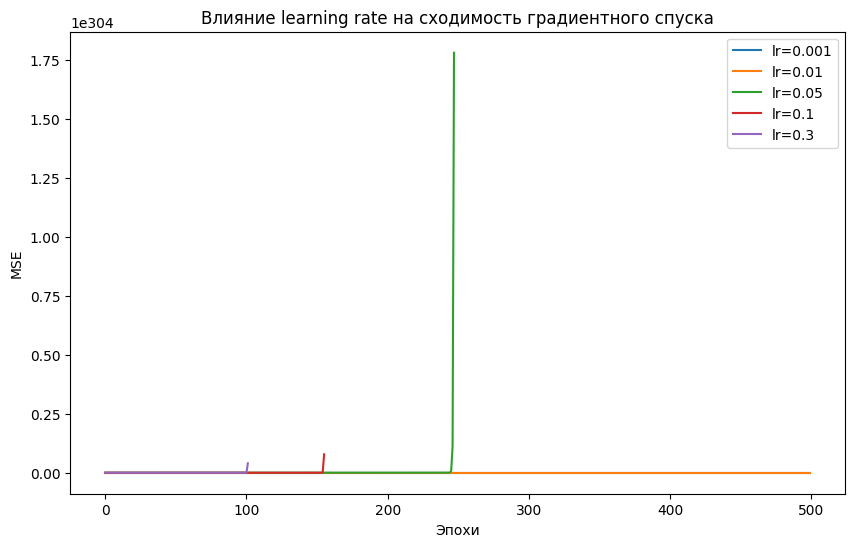

In [ ]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.3]
n_epochs = 500
m = len(y)

plt.figure(figsize=(10,6))
theta_final = {}
final_mse = {}

for lr in learning_rates:
    theta = np.random.randn(2,1)
    mse_history = []

    for epoch in range(n_epochs):
        y_pred = X_b.dot(theta)
        gradients = (2/m) * X_b.T.dot(y_pred - y)
        theta -= lr * gradients
        mse_history.append(compute_mse(y, y_pred))

    theta_final[lr] = theta
    final_mse[lr] = mse_history[-1]
    plt.plot(range(n_epochs), mse_history, label=f'lr={lr}')

best_lr = min(final_mse, key=final_mse.get)
theta = theta_final[best_lr]

print(f"Лучший learning rate: {best_lr}")
print(f"Найденный intercept: {theta[0][0]:.3f}")
print(f"Найденный коэффициент (slope): {theta[1][0]:.3f}")

plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.title('Влияние learning rate на сходимость градиентного спуска')
plt.legend()
plt.show()

 Scatter plot и линия регрессии и Построение 95% доверительного интервала линии регрессии вокруг предсказанных значений

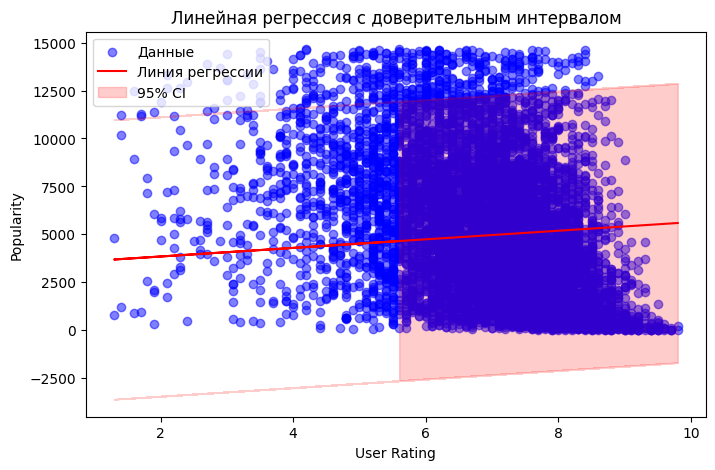

In [ ]:
y_pred_line = X_b.dot(theta)

residuals = y - y_pred_line
std_err = np.std(residuals)
ci = 1.96 * std_err

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Данные')
plt.plot(X, y_pred_line, color='red', label='Линия регрессии')
plt.fill_between(X.ravel(), (y_pred_line - ci).ravel(), (y_pred_line + ci).ravel(), color='red', alpha=0.2, label='95% CI')
plt.xlabel('User Rating')
plt.ylabel('Popularity')
plt.title('Линейная регрессия с доверительным интервалом')
plt.legend()
plt.show()

Модель:
$z = X w + b,\quad \hat{p} = \sigma(z) = \frac{1}{1 + e^{-z}}$

Функция потерь:
$L = -\frac{1}{N} \sum_{i=1}^{N} \Big[ y_i \log \hat{p}_i + (1 - y_i) \log (1 - \hat{p}_i) \Big]$

Градиенты:

$\frac{\partial L}{\partial w} = \frac{1}{N} X^\top (\hat{p} - y)$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (\hat{p}_i - y_i)$


#Логистическая регрессия (реализация с нуля).
Реализовать лог-функцию, сигмоиду и обучение градиентным спуском (можно использовать регуляризацию L2 по желанию).

Подготовка бинарной цели и разбиение на train/test

In [ ]:
y = (df_clean['Popularity'] > df_clean['Popularity'].median()).astype(int).values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train_b = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test_b = np.hstack([np.ones((X_test.shape[0],1)), X_test])

Пункт 1: Определяем сигмоиду и лог-функцию потерь
* Сигмоида переводит любое значение в диапазон (0,1).

* Loss — стандартная бинарная кросс-энтропия.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

Пункт 2: Градиентный спуск для логистической регрессии
* Градиент для логистической регрессии отличается от линейной.
* Можно добавить L2 регуляризацию (l2*theta) по желанию.

In [ ]:
def logistic_gradient_descent(X, y, lr=0.1, epochs=500, l2=0.0):
    m = len(y)
    theta = np.random.randn(X.shape[1],1)
    history = []

    for epoch in range(epochs):
        z = X.dot(theta)
        y_pred = sigmoid(z)
        gradients = (1/m) * X.T.dot(y_pred - y) + l2 * theta
        theta -= lr * gradients
        loss = compute_loss(y, y_pred)
        history.append(loss)

    return theta, history

Mini-batch gradient descent

In [ ]:
def logistic_gradient_descent_minibatch(X, y, lr=0.1, epochs=500, batch_size=32, l2=0.0):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            z = X_batch.dot(theta)
            y_pred = sigmoid(z)

            gradients = (1/len(y_batch)) * X_batch.T.dot(y_pred - y_batch) + l2 * theta
            theta -= lr * gradients

        full_pred = sigmoid(X.dot(theta))
        history.append(compute_loss(y, full_pred))

    return theta, history

Пункт 3: Обучение модели и график потерь
* Видим, как с каждой эпохой уменьшается логистическая потеря.
* Коэффициенты интерсепта и slope для сигмоидной модели.

In [ ]:
learning_rate = 0.1
epochs = 500
l2_reg = 0.01

theta_log, history_log = logistic_gradient_descent(X_train_b, y_train, lr=learning_rate, epochs=epochs, l2=l2_reg)

print(f"Intercept: {theta_log[0][0]:.3f}, Slope: {theta_log[1][0]:.3f}")

Intercept: 0.851, Slope: -0.136




> График потерь на train


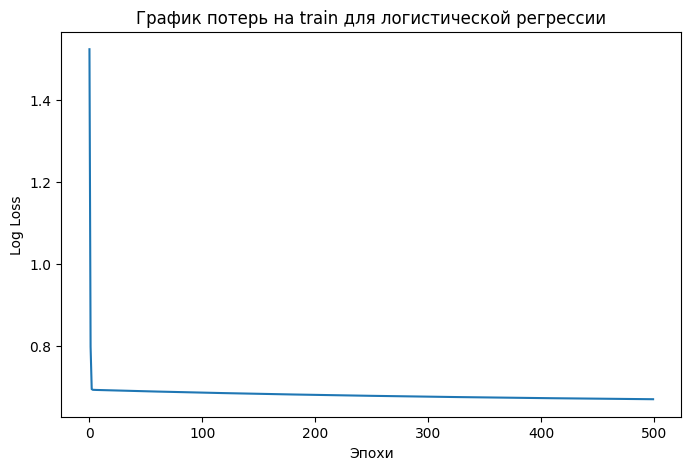

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_log)
plt.xlabel('Эпохи')
plt.ylabel('Log Loss')
plt.title('График потерь на train для логистической регрессии')
plt.show()



> Оценка на test



In [ ]:
y_test_prob = sigmoid(X_test_b.dot(theta_log))
y_test_pred = (y_test_prob >= 0.5).astype(int)
accuracy = np.mean(y_test_pred == y_test)
print(f"Точность на test: {accuracy:.3f}")

Точность на test: 0.613





> Визуализация сигмоиды на train





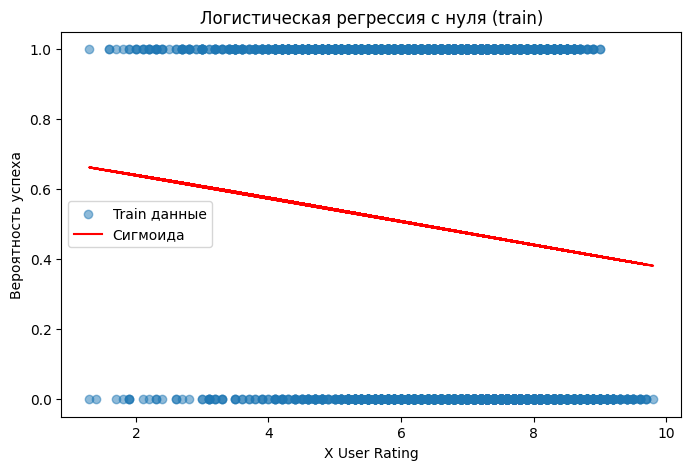

In [ ]:
y_train_prob = sigmoid(X_train_b.dot(theta_log))

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, alpha=0.5, label='Train данные')
plt.plot(X_train, y_train_prob, color='red', label='Сигмоида')
plt.xlabel('X User Rating')
plt.ylabel('Вероятность успеха')
plt.title('Логистическая регрессия с нуля (train)')
plt.legend()
plt.show()

#Классификация (два подхода).
* Разделить задачу классификации на классы (binary / multiclass — описать).
* Обязательная модель: логистическая регрессия (реализованная в пункте 2).
* Дополнительная модель мы выбрали: решающее дерево (Decision Tree).
* Для второй модели можно использовать sklearn (если команда обосновывает выбор); но указать и сравнить ( accuracy).




> Определение классов и тип задачи



In [ ]:
y_binary = (df_clean['Popularity'] > df_clean['Popularity'].median()).astype(int).values.reshape(-1,1)
print("Binary classification: 0 = низкая Popularity, 1 = высокая Popularity")

Binary classification: 0 = низкая Popularity, 1 = высокая Popularity


### Binary vs Multiclass

В проекте используется бинарная классификация:

- **0** — популярность ниже медианы  
- **1** — популярность выше медианы  

Также возможно формулировать задачу как *multiclass*, например:

- 0 — низкая популярность  
- 1 — средняя  
- 2 — высокая  

Но для логистической регрессии с нуля multiclass потребовал бы:
- One-vs-Rest (OvR)
- или Softmax regression

Поэтому binary-классификация выбрана как оптимальная для требований проекта.


Пункт 1: Логистическая регрессия (из предыдущего пункта)
* Используем модель, которую реализовали с нуля.
* Считаем точность (accuracy) на test.

In [ ]:
y_test_prob = sigmoid(X_test_b.dot(theta_log))
y_test_pred_log = (y_test_prob >= 0.5).astype(int)

accuracy_log = np.mean(y_test_pred_log == y_test)
print(f"Accuracy логистической регрессии: {accuracy_log:.3f}")

Accuracy логистической регрессии: 0.613


Пункт 2: Решающее дерево (Decision Tree) с sklearn
* Используем sklearn для удобства и точности.
* max_depth ограничиваем, чтобы дерево не переобучалось.
* Можно сравнить точность с логистической регрессией.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_test_pred_dt = dt_model.predict(X_test)

accuracy_dt = np.mean(y_test_pred_dt == y_test)
print(f"Accuracy Decision Tree: {accuracy_dt:.3f}")

Accuracy Decision Tree: 0.500




> Пункт 3: Сравнение моделей


In [ ]:
print("Сравнение моделей на test:")
print(f"Логистическая регрессия: {accuracy_log:.3f}")
print(f"Decision Tree: {accuracy_dt:.3f}")

Сравнение моделей на test:
Логистическая регрессия: 0.613
Decision Tree: 0.500


# Эксперименты и метрики.
Для каждой модели предоставить: accuracy, precision, recall, F1-score, confusion matrix; для бинарной классификации — ROC AUC.
Сравнить модели по качеству и объяснить различия (почему Логистическая регрессия выигрывает/проигрывает, роль признаков, переобучение и т.д.).
Провести эксперимент с разными значениями learning rate / epochs / batch size и показать влияние на сходимость.


Пункт 1: Метрики для каждой модели

*Logistic regression*

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

y_test_pred_log = (sigmoid(X_test_b.dot(theta_log)) >= 0.5).astype(int)

accuracy_log = accuracy_score(y_test, y_test_pred_log)
precision_log = precision_score(y_test, y_test_pred_log)
recall_log = recall_score(y_test, y_test_pred_log)
f1_log = f1_score(y_test, y_test_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_test_pred_log)
roc_auc_log = roc_auc_score(y_test, sigmoid(X_test_b.dot(theta_log)))

print("Логистическая регрессия:")
print(f"Accuracy: {accuracy_log:.3f}")
print(f"Precision: {precision_log:.3f}")
print(f"Recall: {recall_log:.3f}")
print(f"F1-score: {f1_log:.3f}")
print("Confusion matrix:")
print(conf_matrix_log)
print(f"ROC AUC: {roc_auc_log:.3f}")

Логистическая регрессия:
Accuracy: 0.613
Precision: 0.726
Recall: 0.373
F1-score: 0.492
Confusion matrix:
[[1106  184]
 [ 820  487]]
ROC AUC: 0.698


*Desicin tree*

In [ ]:
y_test_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])

print("\nDecision Tree:")
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-score: {f1_dt:.3f}")
print("Confusion matrix:")
print(conf_matrix_dt)
print(f"ROC AUC: {roc_auc_dt:.3f}")


Decision Tree:
Accuracy: 0.641
Precision: 0.653
Recall: 0.613
F1-score: 0.632
Confusion matrix:
[[864 426]
 [506 801]]
ROC AUC: 0.693


Пункт 2: Сравнение моделей

In [ ]:
print("\nСравнение моделей по качеству:")
if accuracy_log > accuracy_dt:
    print("Логистическая регрессия точнее Decision Tree на данном наборе данных.")
else:
    print("Decision Tree точнее логистической регрессии на данном наборе данных.")

print("Объяснение различий (пример):")
print("- Логистическая регрессия хорошо работает, если связь линейная и мало признаков.")
print("- Decision Tree может переобучаться на малом количестве признаков или шуме.")
print("- Выбор признаков, регуляризация, размер данных влияют на качество.")


Сравнение моделей по качеству:
Decision Tree точнее логистической регрессии на данном наборе данных.
Объяснение различий (пример):
- Логистическая регрессия хорошо работает, если связь линейная и мало признаков.
- Decision Tree может переобучаться на малом количестве признаков или шуме.
- Выбор признаков, регуляризация, размер данных влияют на качество.


Пункт 3: Эксперимент с разными learning rate / epochs / batch size

Влияние learning rate и epochs на сходимость

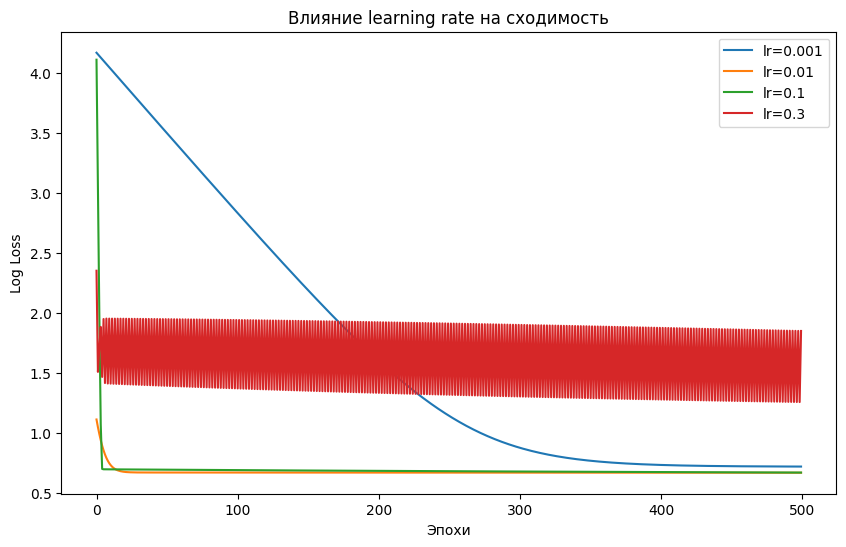

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 0.3]
epochs_list = [100, 300, 500]

plt.figure(figsize=(10,6))

for lr in learning_rates:
    theta = np.random.randn(X_train_b.shape[1],1)
    history = []
    for epoch in range(500):
        y_pred = sigmoid(X_train_b.dot(theta))
        gradients = (1/len(y_train)) * X_train_b.T.dot(y_pred - y_train)
        theta -= lr * gradients
        history.append(compute_loss(y_train, y_pred))
    plt.plot(range(len(history)), history, label=f'lr={lr}')

plt.xlabel('Эпохи')
plt.ylabel('Log Loss')
plt.title('Влияние learning rate на сходимость')
plt.legend()
plt.show()

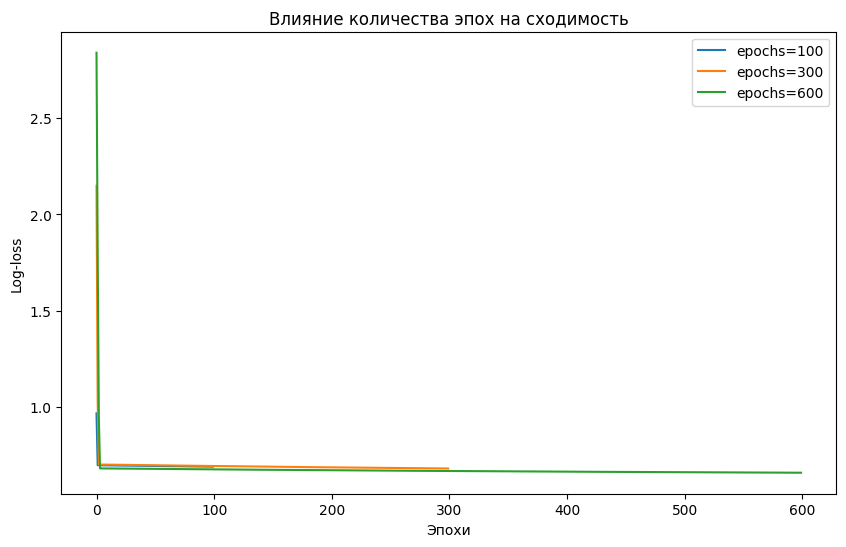

In [ ]:
epochs_list = [100, 300, 600]

plt.figure(figsize=(10,6))

for ep in epochs_list:
    theta = np.random.randn(X_train_b.shape[1], 1)
    history = []

    for epoch in range(ep):
        y_pred = sigmoid(X_train_b.dot(theta))
        gradients = (1/len(y_train)) * X_train_b.T.dot(y_pred - y_train)
        theta -= 0.1 * gradients
        history.append(compute_loss(y_train, y_pred))

    plt.plot(range(ep), history, label=f'epochs={ep}')

plt.xlabel("Эпохи")
plt.ylabel("Log-loss")
plt.title("Влияние количества эпох на сходимость")
plt.legend()
plt.show()